In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load data

In [69]:
# Load csv file
df_train = pd.read_csv('../data_csv/aug_train.csv')
df_test = pd.read_csv('../data_csv/aug_test.csv')

In [80]:
test_target = np.load('../data_csv/jobchange_test_target_values.npy')

In [36]:
# df

In [5]:
# Check each column
# terminal install: conda install -c conda-forge pandas-profiling
from pandas_profiling import ProfileReport as pr
profile = pr(df_train, minimal=True).to_notebook_iframe()

### 2. Examine and impute missing values

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

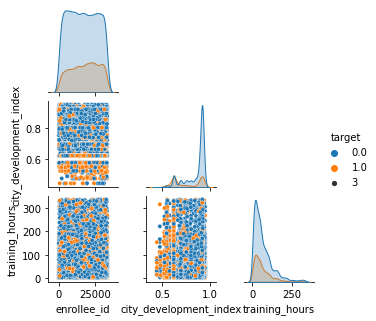

In [68]:
# Pairplot
sns.pairplot(df_train, corner=True, height=1.5, plot_kws={'size': 3}, hue='target');

In [72]:
# Examine data
df_train['company_type'].value_counts()

df_train['enrolled_university'].value_counts()

df_train['education_level'].value_counts()

df_train['experience'].value_counts()

df_train['company_size'].value_counts()

df_train['company_type'].value_counts()

df_train['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [73]:
# Replace string with float/int
df_train['experience'] = df_train['experience'].replace('>20','25')
df_train['experience'] = df_train['experience'].replace('<1','0.5')
df_train['experience'] = df_train['experience'].astype('float')
df_train['last_new_job'] = df_train['last_new_job'].replace('>4','5')
df_train['last_new_job'] = df_train['last_new_job'].replace('never','0')

In [75]:
# Impute/fill NaN
df_train['gender'] = df_train['gender'].replace(np.nan, 'unknown')
df_train['enrolled_university'] = df_train['enrolled_university'].replace(np.nan, 'unknown')
df_train['education_level'] = df_train['education_level'].replace(np.nan, 'unknown')
df_train['major_discipline'] = df_train['major_discipline'].replace(np.nan, 'unknown')
df_train['education_level'] = df_train['education_level'].replace(np.nan, 'unknown')
df_train['experience'] = df_train['experience'].fillna(value = df_train['experience'].median())
df_train['company_size'] = df_train['company_size'].fillna(value = df_train['company_size'].value_counts().index[0])
df_train['company_type'] = df_train['company_type'].replace(np.nan, 'unknown')
df_train['last_new_job'] = df_train['last_new_job'].fillna(value = df_train['last_new_job'].median()).astype('int')
df_train['target'] = df_train['target'].astype('int')

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  float64
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(2), int64(4), object(8)
mem

### 3. Pickle

In [63]:
df_train.to_pickle('../dump/df_train.csv')

### 4. Repeat for test set

#### Examine and impute missing values

In [81]:
df_test['target'] = test_target

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
 13  target                  2129 non-null   float64
dtypes: float64(2), int64(2), object(10)
memo

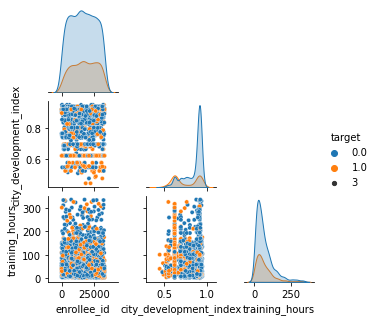

In [83]:
# Pairplot
sns.pairplot(df_test, corner=True, height=1.5, plot_kws={'size': 3}, hue='target');

In [72]:
# Examine data
df_train['company_type'].value_counts()

df_train['enrolled_university'].value_counts()

df_train['education_level'].value_counts()

df_train['experience'].value_counts()

df_train['company_size'].value_counts()

df_train['company_type'].value_counts()

df_train['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [84]:
# Replace string with float/int
df_test['experience'] = df_test['experience'].replace('>20','25')
df_test['experience'] = df_test['experience'].replace('<1','0.5')
df_test['experience'] = df_test['experience'].astype('float')
df_test['last_new_job'] = df_test['last_new_job'].replace('>4','5')
df_test['last_new_job'] = df_test['last_new_job'].replace('never','0')

In [85]:
# Impute/fill NaN
df_test['gender'] = df_test['gender'].replace(np.nan, 'unknown')
df_test['enrolled_university'] = df_test['enrolled_university'].replace(np.nan, 'unknown')
df_test['education_level'] = df_test['education_level'].replace(np.nan, 'unknown')
df_test['major_discipline'] = df_test['major_discipline'].replace(np.nan, 'unknown')
df_test['education_level'] = df_test['education_level'].replace(np.nan, 'unknown')
df_test['experience'] = df_test['experience'].fillna(value = df_test['experience'].median())
df_test['company_size'] = df_test['company_size'].fillna(value = df_test['company_size'].value_counts().index[0])
df_test['company_type'] = df_test['company_type'].replace(np.nan, 'unknown')
df_test['last_new_job'] = df_test['last_new_job'].fillna(value = df_test['last_new_job'].median()).astype('int')
df_test['target'] = df_test['target'].astype('int')

In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  2129 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2129 non-null   object 
 6   education_level         2129 non-null   object 
 7   major_discipline        2129 non-null   object 
 8   experience              2129 non-null   float64
 9   company_size            2129 non-null   object 
 10  company_type            2129 non-null   object 
 11  last_new_job            2129 non-null   int64  
 12  training_hours          2129 non-null   int64  
 13  target                  2129 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memor

### 3. Pickle

In [87]:
df_test.to_pickle('../dump/df_test.csv')